# Coventry University
 - **MSc Data Science**
 - **Machine Learning Coursework**
 - **7172 CEM**

**Importing necessary libraries**

In [1]:
#Data analysis and visualization library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Statistics library

import os
from scipy import stats
from scipy.stats import zscore



In [2]:
#Model Training and Test library

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
import warnings
warnings.filterwarnings('ignore')


**Data Collection**

**Data Cleaning & Exploration Analysis**

**Feature Engineering**

**Feature Selection**

**Data Split**

**Feature Scaling**

**Model Selection**

**Model Training**

**Model Testing**

**Model Evaluation**

**Model Validation**

**Performance Comparison**


# Data Collection

**DATASET LINK**

https://archive.ics.uci.edu/static/public/262/turkiye+student+evaluation.zip

In [4]:
#Loading the dataset using Pandas

evaluation_data = pd.read_csv('turkey_student_eval.csv')

# Data Cleaning & Exploration Analysis 

In [5]:
#Viewing the top 5 rows of the dataframe

evaluation_data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
#Viewing the last 5 rows of the dataframe

evaluation_data.tail()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
#Displaying a quick overview of the dataset's structure

evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

Displaying all the column labels.

Non-null count: There are no missing values.

All values in the column are integers.

Dataset Memory usage by the column's data is 1.6mb

In [8]:
# Checking statistics summary of the dataset

evaluation_data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


**Distribution Plot**

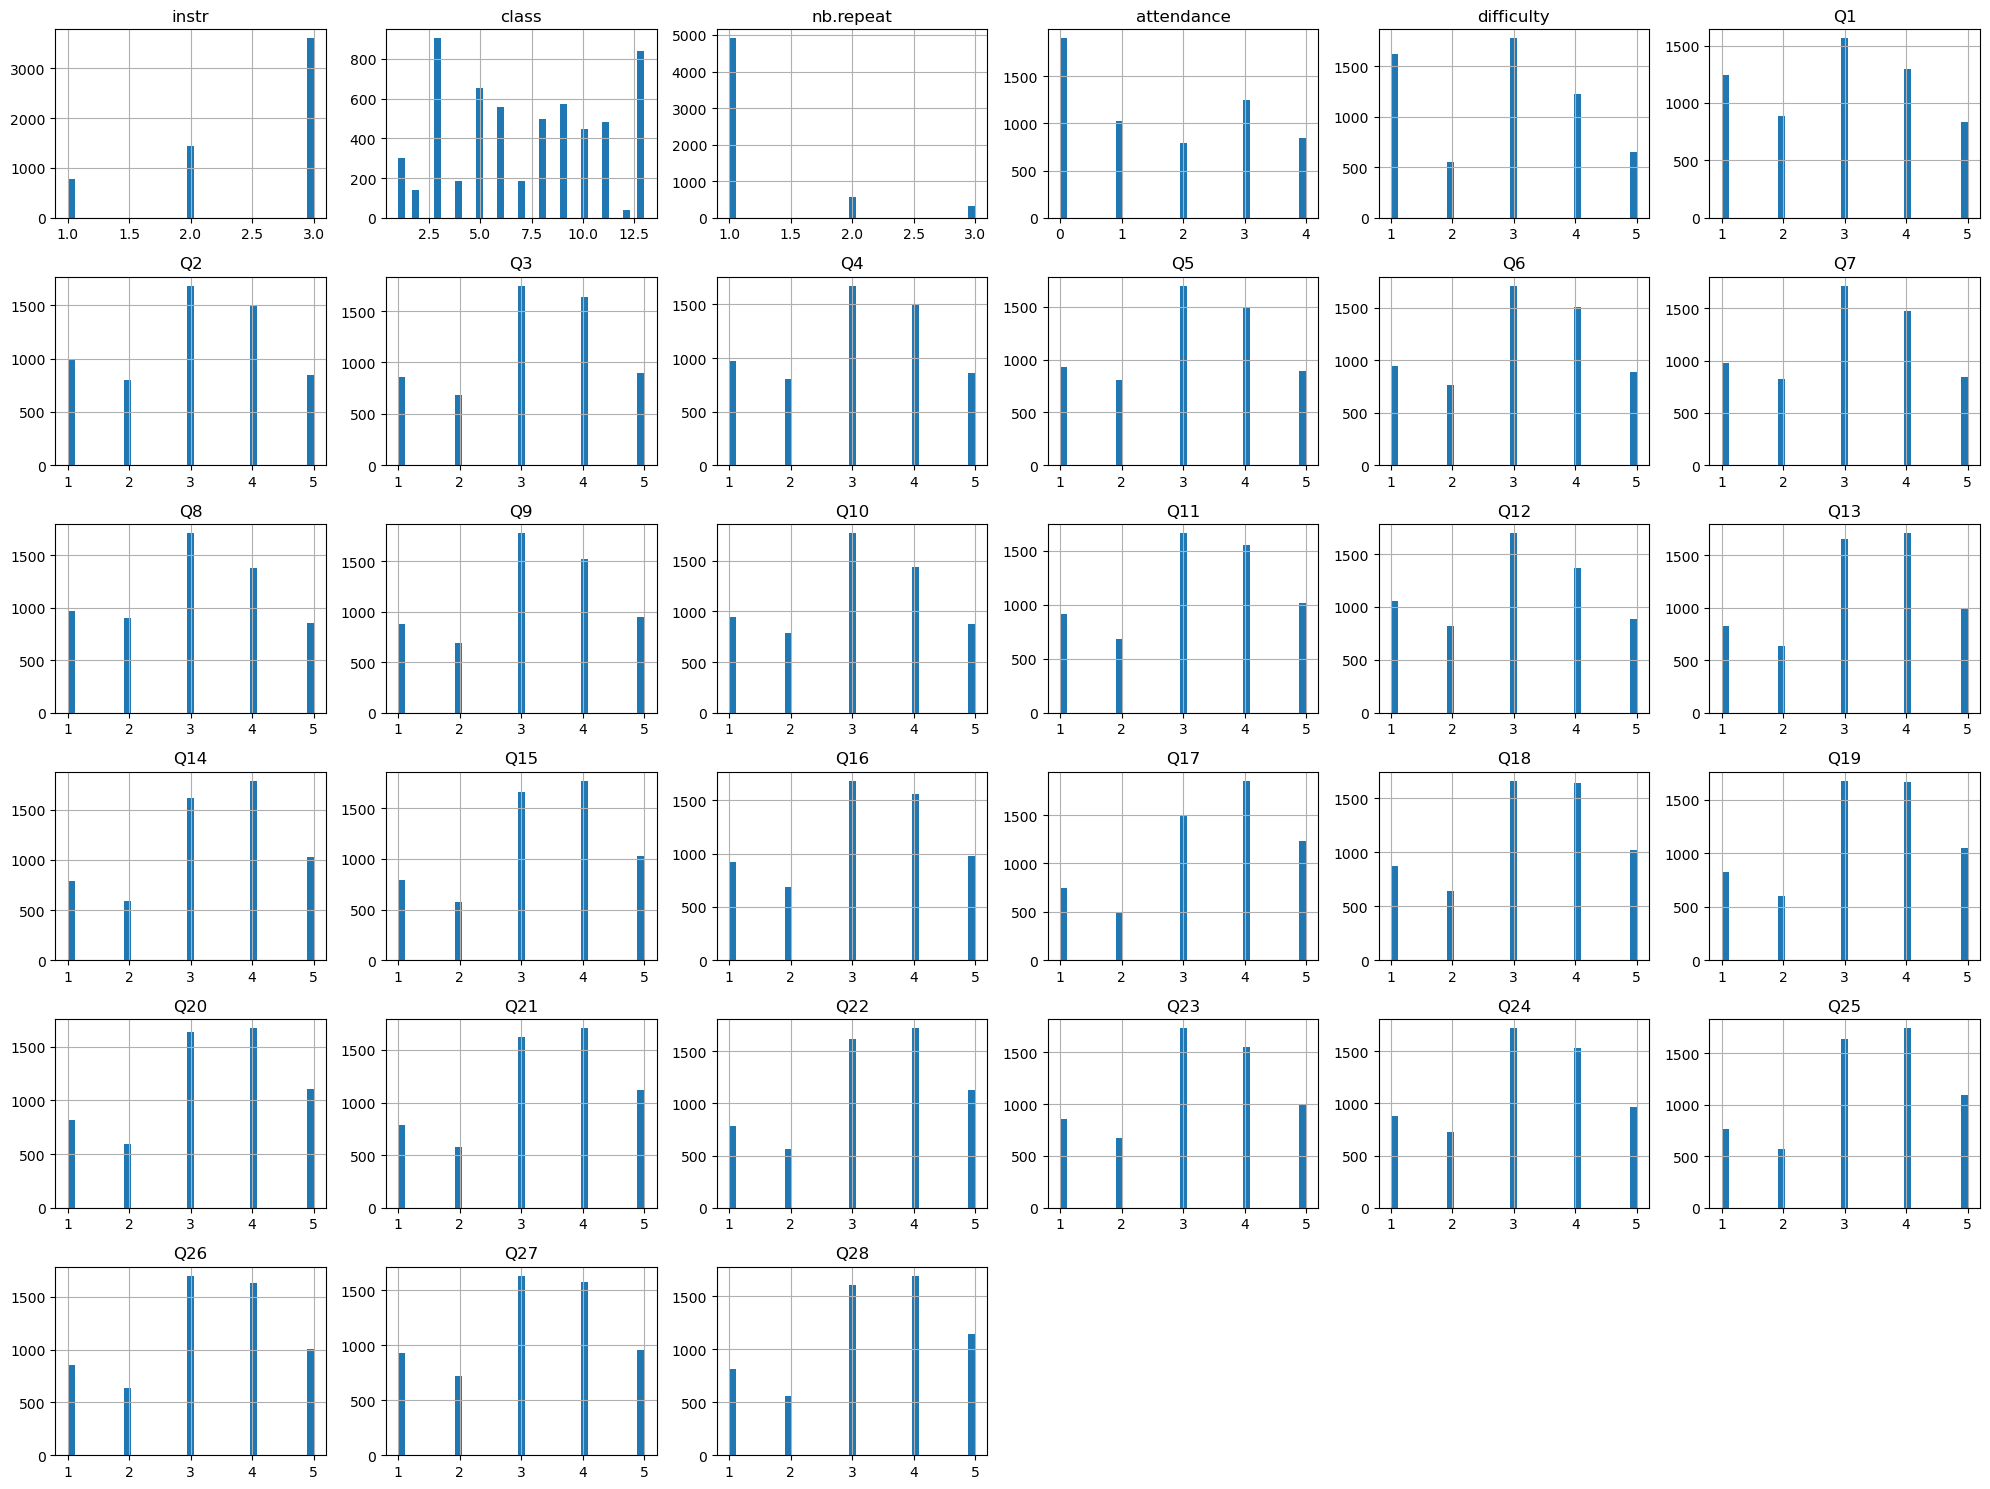

In [9]:
#Visualizing the distribution of scores for each column.

evaluation_data.hist(bins=35, figsize=(20,15))
plt.tight_layout()
plt.show()


   **What we can tell about the Categorical features from the distribution plot**

**Instructor plot** - The 3rd Instructor taught more courses, has more teaching hours and handles more classes.

**Class plot** - Class 3 had more activities, more students and offered more courses which is likely to increase the response, ratings and feedback followed closely by class 13.

**nb.repeat plot** - Majority of the class scale through without repeating courses.

**attendance** - Majority of the student miss classes with 0 indicating absent and 4 indicating present.

**difficulty** - There is a medium difficulty posing no extremes, that means courses are neither easy nor tough.

**Performing a cross-tabulation analysis**

This cross-tabulation analysis will help us understand how different instructors are associated with different classes.

In [10]:
# Generate cross-tabulation

cross_tab = pd.crosstab(evaluation_data['instr'], evaluation_data['class'])

cross_tab


class,1,2,3,4,5,6,7,8,9,10,11,12,13
instr,,,,,,,,,,,,,
1,0,140,0,0,0,0,187,0,0,448,0,0,0
2,303,0,0,0,0,558,0,0,0,0,484,0,99
3,0,0,904,187,656,0,0,500,571,0,0,41,742


- Instructor 1 handles a total number of 3 classes (class 2, class 7 and class 10)

- Instructor 2 handles a total number of 4 classes (class 1, class 6, class 11 and class 13)

- Instructor 3 handles a total number of 7 classes (class 3, class 4, class 5, class 8, class 9, class 12 & class 13)


**Visualizing the relationship between Instructors and Classes**

Each bar represents an instructor and the stacked segments in each bar represent the different classes taught by that instructor.

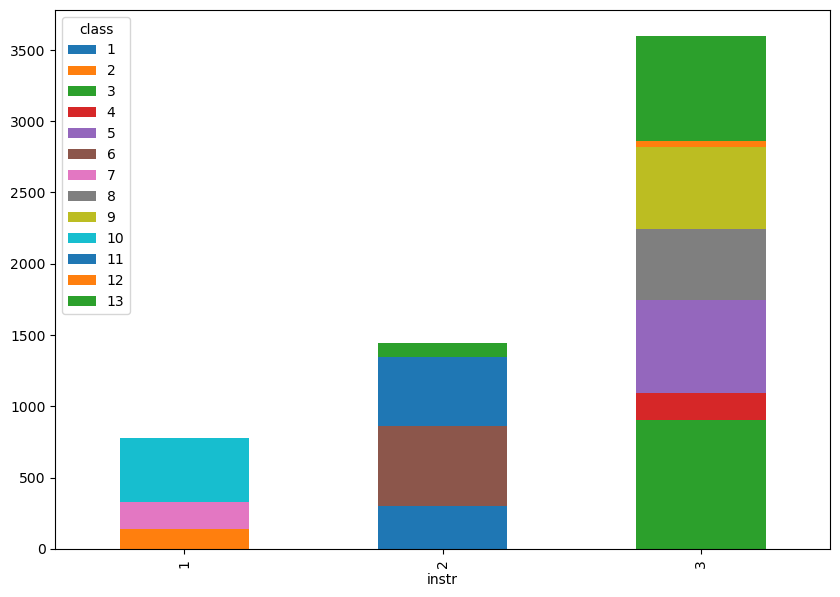

In [11]:
# Plot the stacked bar chart

cross_tab.plot(kind='bar', stacked=True, figsize=(10,7))
plt.show()


**Number of students per instructor**

Since the dataset has a RangeIndex: 5820 entries, 0 to 5819, it is safe to say we can calculate the number of students using groupby


In [12]:

students_per_instr = evaluation_data.groupby('instr').size()

# Grouping in a Dataframe

result_table = pd.DataFrame({'Number of Students': students_per_instr})

# Adding index column

result_table['instr'] = result_table.index

# Reorder columns

result_table = result_table[['instr', 'Number of Students']]

print(result_table)

print('Total number of students', students_per_instr.sum())


       instr  Number of Students
instr                           
1          1                 775
2          2                1444
3          3                3601
Total number of students 5820


**Visualizing the distribution of students per instructor using a Bar plot**

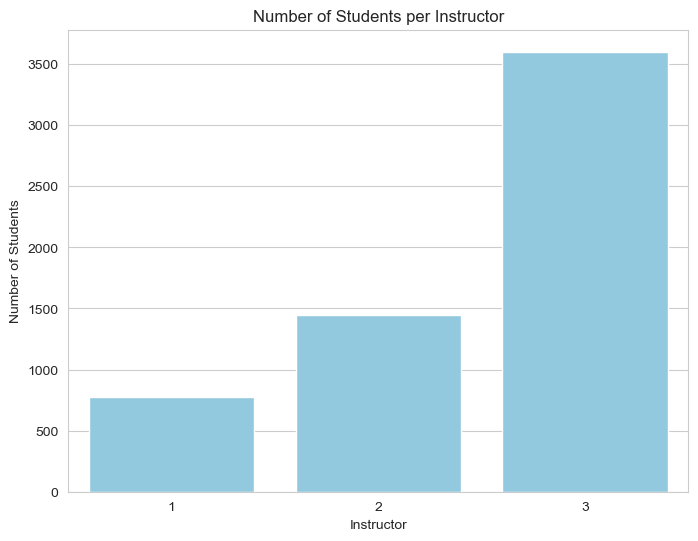

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=students_per_instr.index, y=students_per_instr.values, color='skyblue')
plt.xlabel('Instructor')
plt.ylabel('Number of Students')
plt.title('Number of Students per Instructor')
plt.show()


This shows that the 3rd Instructor handles more student and more classes and the 1st Instructor handles the least.

# Feature Engineering

**Creating Aggregate Features**

Creating new features from existing ones  and analyzing their collective impact on overall instructor ratings. 
We extracted a few columns related to instructor effectiveness such as Q13-Q28 which display's all the instructor related attributes in this case and calculated the Mean Average.


- Average mean for instructor-related questions (Q13-Q28) 


In [14]:
# list of columns related to the instructor's effectiveness

instructor_related_columns = [f'Q{i}' for i in range(13, 29)]

# create a new column that is the mean of the instructor-related columns
evaluation_data['Instructor_Effectiveness'] = evaluation_data[instructor_related_columns].mean(axis=1)

# To get average instructor effectiveness for each instructor
instructor_effectiveness = evaluation_data.groupby('instr')['Instructor_Effectiveness'].mean()

# Display the effectiveness
print(instructor_effectiveness)


instr
1    3.408468
2    3.479527
3    3.138989
Name: Instructor_Effectiveness, dtype: float64


In [15]:
evaluation_data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Instructor_Effectiveness
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3.0
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3.0
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3.0
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.0


**Creating a target variable**

Creating a new target variable that represents overall course satisfaction and student experience. 

In [16]:
# Creating a target variable (overall course satisfaction)

evaluation_data['overall_satisfaction'] = evaluation_data[instructor_related_columns].mean(axis=1)

# Define the satisfaction categories and corresponding labels

satisfaction_bins = [0, 2, 4, 5]  # Example bins, adjust as per your requirements

satisfaction_labels = ['Low', 'Medium', 'High']  # Labels for the satisfaction levels

# Convert the overall_satisfaction to categorical variable based on the defined bins and labels

evaluation_data['satisfaction_level'] = pd.cut(evaluation_data['overall_satisfaction'], bins=satisfaction_bins, labels=satisfaction_labels)



# Data Split

In [17]:
# Drop the target variable from the dataset

X = evaluation_data.drop('satisfaction_level', axis=1)

X

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Instructor_Effectiveness,overall_satisfaction
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0000,3.0000
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0000,3.0000
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5.0000,5.0000
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0000,3.0000
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0000,1.0000
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,4,5,5,5,5,5,4.9375,4.9375
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5.0000,5.0000
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0000,1.0000


**Label Encoding our dependent ordinal categorical variable**

In [18]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical target variable
target_variable = label_encoder.fit_transform(evaluation_data['satisfaction_level'])


In [19]:
y = target_variable

**Data Partitioning**

In [20]:

# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Feature Selection using Statistical Tests called chi-squared to select top 10 features**

In [21]:
# Applying chi-square test for feature selection

selector = SelectKBest(chi2, k=10)

X_train_new = selector.fit_transform(X_train, y_train)

X_test_new = selector.transform(X_test)


# Selected feature names

selected_features = X.columns[selector.get_support()]


# Print the selected feature names

print('Selected features: ', selected_features)


Selected features:  Index(['Q14', 'Q16', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q26',
       'overall_satisfaction'],
      dtype='object')


**New Data Split**

In [22]:
# Creating a new DataFrame with the selected features

X_selected = X[selected_features]


# Spliting into training and testing sets using the selected features

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

y = target_variable

**Feature Scaling**

In [23]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train_selected)

# Apply the scaler to both the training and test sets
X_train_scaled = scaler.transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


The selected features have been standardized to have zero mean and unit variance.

# # Model Selection, Training, Testing and Evaluation

# Logistic Regression Algorithm

In [24]:
# Create a Logistic Regression model

logreg = LogisticRegression()

# Train the model using the selected features

logreg.fit(X_train_scaled, y_train)

# Predictions on the test set

y_pred = logreg.predict(X_test_scaled)

In [25]:
# Evaluate the Logistic model

logreg_report = classification_report(y_test, y_pred)
print("Logistic Regression Report:")
print(logreg_report)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       391
           1       0.97      1.00      0.98       334
           2       0.98      0.98      0.98      1021

    accuracy                           0.98      1746
   macro avg       0.97      0.97      0.97      1746
weighted avg       0.98      0.98      0.98      1746



In [26]:
# Compute the confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 368,    0,   23],
       [   0,  334,    0],
       [   8,   11, 1002]])

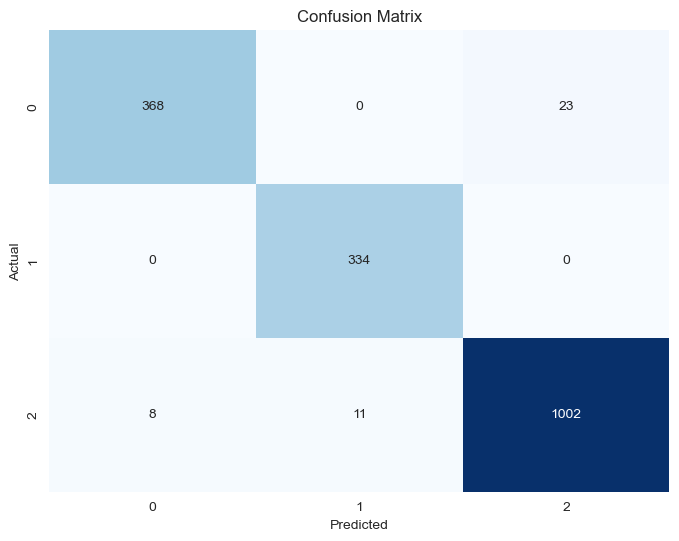

In [27]:

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# KNN algorithm

In [28]:
# Create a KNN classifier

knn = KNeighborsClassifier()

# Train the KNN classifier

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# Make predictions on the test set

knn_predictions = knn.predict(X_test)

In [30]:
# Evaluate the KNN model

knn_report = classification_report(y_test, knn_predictions)
print("KNN Report:")
print(knn_report)



KNN Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       391
           1       0.91      0.99      0.95       334
           2       0.93      0.97      0.95      1021

    accuracy                           0.94      1746
   macro avg       0.94      0.92      0.93      1746
weighted avg       0.94      0.94      0.93      1746



This model shows reasonably high precision across all classes, with values ranging from 0.90 to 0.92. This indicates that when the model predicts a particular class, it is correct around 90% to 92% of the time.

The model also demonstrates good recall values, ranging from 0.81 to 0.97. This indicates that the model can effectively identify a high proportion of instances belonging to each class.

The F1-scores are also quite high, ranging from 0.86 to 0.94. The F1-score considers both precision and recall, providing a balanced measure of the model's performance.

The overall accuracy of the KNN model is approximately 0.92, which indicates that it correctly predicts the instructor evaluations for around 92% of the instances in the test set.

Overall, the KNN model shows promising performance, with high precision, recall, and F1-scores for each class. It demonstrates the ability to classify instructor evaluations accurately.



# Naive Bayes Algorithm

In [31]:
# Create a Naive Bayes classifier

naive_bayes = GaussianNB()

# Train the Naive Bayes classifier

naive_bayes.fit(X_train, y_train)



GaussianNB()

In [32]:
# Make predictions on the test set

naive_bayes_predictions = naive_bayes.predict(X_test)

In [33]:
# Evaluate the Naive Bayes model

naive_bayes_report = classification_report(y_test, naive_bayes_predictions)
print("Naive Bayes Report:")
print(naive_bayes_report)


Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       391
           1       0.93      0.98      0.95       334
           2       0.96      0.97      0.96      1021

    accuracy                           0.96      1746
   macro avg       0.96      0.95      0.95      1746
weighted avg       0.96      0.96      0.96      1746



Based on the Naive Bayes report, the precision varies across classes. 
Class 1 has perfect precision, indicating that all predictions for this class were correct. 
Class 2 has a precision of 0.67, which means that 67% of the instances predicted as Class 2 were correct. 
Class 3 has perfect precision as well.

Class 1 and Class 3 have high recall values of 1.00, indicating that the classifier can identify the majority of instances belonging to these classes. Class 2 has a recall of 1.00, indicating that all instances of Class 2 were correctly classified.

The F1-scores range from 0.81 to 1.00. Class 2 has the lowest F1-score of 0.81, suggesting that it has a lower harmonic mean of precision and recall compared to the other classes.

The overall accuracy of the Naive Bayes classifier is approximately 0.87, indicating that it correctly predicts the instructor evaluations for around 87% of the instances in the test set.

The Naive Bayes model shows reasonably good performance, with high precision, recall, and F1-scores for some classes. However, the lower precision and F1-score for Class 2 indicate that the model struggles to accurately predict instances of this class.

# SVM algorithm

In [34]:
# Create an SVM classifier

svm_classifier = SVC()

# Train the SVM classifier

svm_classifier.fit(X_train, y_train)

SVC()

In [35]:
# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

In [36]:
# Evaluate the SVM model
svm_report = classification_report(y_test, svm_predictions)
print("SVM Report:")
print(svm_report)


SVM Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       391
           1       0.97      0.99      0.98       334
           2       0.97      0.99      0.98      1021

    accuracy                           0.98      1746
   macro avg       0.98      0.97      0.98      1746
weighted avg       0.98      0.98      0.98      1746



The precision values are consistently high for all classes. Class 0 and Class 1 have perfect precision, indicating that all predictions for these classes were correct. 
Class 2 has a precision of 0.97, indicating that 97% of the instances predicted as Class 2 were correct.

Class 1 and Class 2 have perfect recall, indicating that the model can identify all instances belonging to these classes. Class 0 has a recall of 0.99, indicating that 99% of the instances of Class 0 were correctly classified.

The F1-scores are high for all classes, ranging from 0.96 to 0.99. This indicates a good balance between precision and recall, with high harmonic mean values for all classes.

The overall accuracy of the SVM model is approximately 0.98, indicating that it correctly predicts the instructor evaluations for around 98% of the instances in the test set.

#  Model Validation
   -**Cross Validation**

In [37]:

# Create the models

logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
svm_model = SVC()

# Listing names of models

models = [logreg_model, knn_model, nb_model, svm_model]
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM']

# Perform cross-validation and print the results

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    print(f'{name} CV Scores:', scores)
    print(f'{name} Mean CV Score:', scores.mean())
    print(f'{name} Standard Deviation:', scores.std())
    print()


Logistic Regression CV Scores: [0.98281787 0.97079038 0.96649485 0.97250859 0.97938144]
Logistic Regression Mean CV Score: 0.9743986254295531
Logistic Regression Standard Deviation: 0.00591225104264096

KNN CV Scores: [0.99054983 0.98969072 0.98797251 0.99054983 0.99054983]
KNN Mean CV Score: 0.9898625429553265
KNN Standard Deviation: 0.0010018817688737592

Naive Bayes CV Scores: [0.96907216 0.96219931 0.93814433 0.95532646 0.95790378]
Naive Bayes Mean CV Score: 0.9565292096219931
Naive Bayes Standard Deviation: 0.010303549381831582

SVM CV Scores: [0.98367698 0.97508591 0.97164948 0.97852234 0.97164948]
SVM Mean CV Score: 0.9761168384879724
SVM Standard Deviation: 0.004558934419732492



**Visualizing the cross validation result**

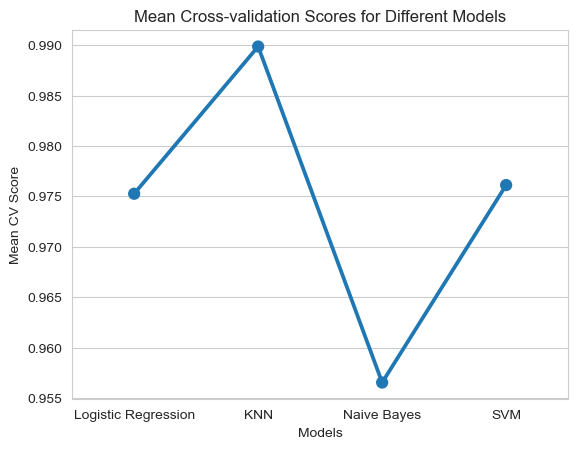

In [38]:

# Create a list of model names and their corresponding mean CV scores

model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM']

mean_cv_scores = [0.975257731958763, 0.9898625429553265, 0.9565292096219931, 0.9761168384879724]

# Create a DataFrame with the model names and mean CV scores

df = pd.DataFrame({'Model': model_names, 'Mean CV Score': mean_cv_scores})

# Create a point plot

sns.pointplot(data=df, x='Model', y='Mean CV Score')

# Set labels and title

plt.xlabel('Models')
plt.ylabel('Mean CV Score')
plt.title('Mean Cross-validation Scores for Different Models')

# Display the plot

plt.show()
